## Exercises

In [111]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [2]:
train = data('iris')

In [3]:
train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
train.columns = [
    col.lower().replace('.','_').replace(' ', '_') for col in train.columns
]

<function matplotlib.pyplot.show(close=None, block=None)>

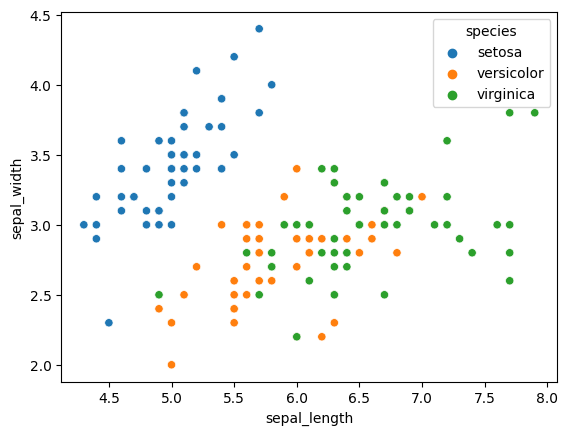

In [41]:
sns.scatterplot(data=train, x='sepal_length', y='sepal_width', hue='species')
plt.show

In [9]:
kmeans = KMeans(n_clusters=3, n_init='auto')
features = train[['sepal_length', 'sepal_width']]
kmeans.fit(features)


KMeans(n_clusters=3, n_init='auto')

In [12]:
train['sk_clusters'] = kmeans.labels_

In [17]:
features = train[['sepal_length', 'sepal_width', 'sk_clusters']]

In [38]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sk_clusters
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


<function matplotlib.pyplot.show(close=None, block=None)>

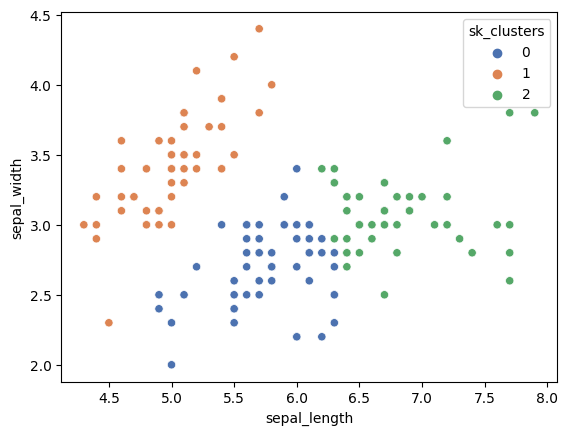

In [ ]:
sns.scatterplot(data=train, x='sepal_length', y='sepal_width', hue='sk_clusters', palette='deep')
plt.show

In [34]:
# Initialize a list to store inertia values
inertia_values = []

# Define a range of cluster numbers to try
cluster_range = range(1, 11)  # You can adjust the upper limit as needed

# Calculate inertia for different numbers of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

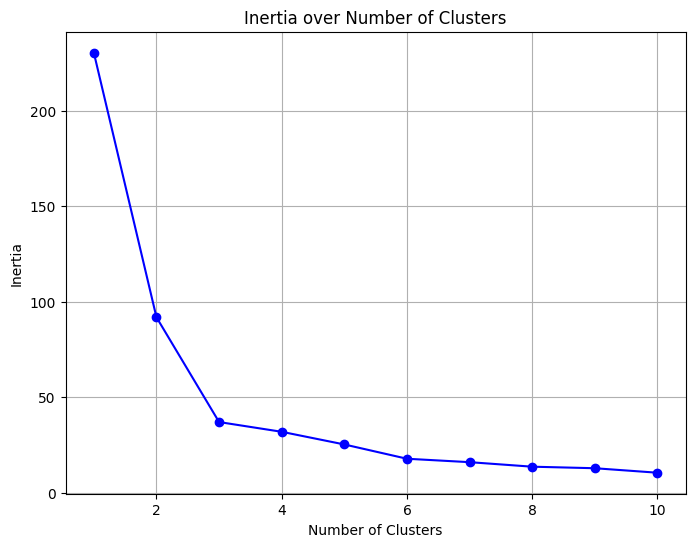

In [35]:
# Plot the inertia values over the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia over Number of Clusters')
plt.grid(True)
plt.show()

2 - Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [44]:
import wrangle

In [47]:
df = wrangle.acquire_mall()

In [48]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
# Define the bin edges and labels
age_bins = [0, 35, 65, 100]  # Customize the bin edges as per your requirements
age_labels = ['0-35', '36-65', '66+']

# Create a new column 'age_bin' with the binned values
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


<function matplotlib.pyplot.show(close=None, block=None)>

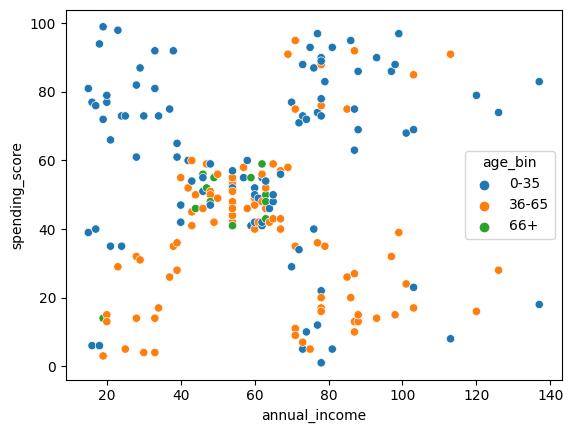

In [60]:
sns.scatterplot(data=df, x='annual_income', y='spending_score', hue='age_bin')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

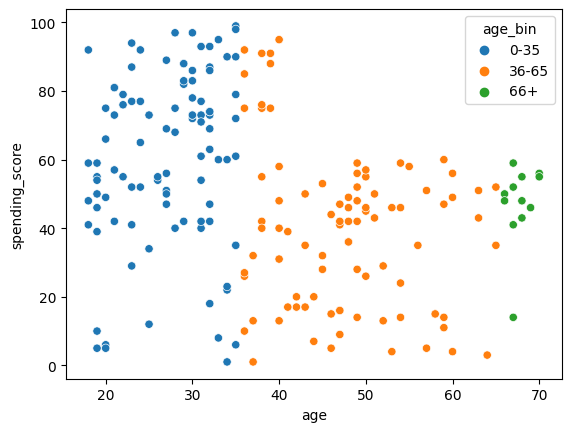

In [61]:
sns.scatterplot(data=df, x='age', y='spending_score', hue='age_bin')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

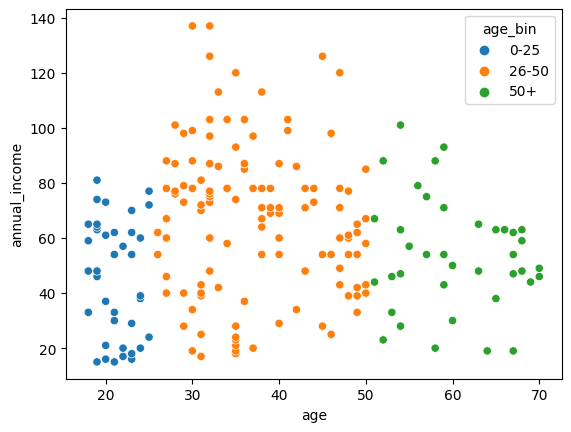

In [108]:
sns.scatterplot(data=df, x='age', y='annual_income', hue='age_bin')
plt.show

In [81]:
kmeans = KMeans(n_clusters=5, n_init='auto')
features = df[['annual_income', 'spending_score']]
kmeans.fit(features)


KMeans(n_clusters=5, n_init='auto')

In [82]:
df['sk_clusters'] = kmeans.labels_

In [83]:
features = df[['annual_income', 'spending_score', 'sk_clusters']]

In [84]:
df.sk_clusters.unique()

array([4, 3, 0, 1, 2], dtype=int32)

In [85]:
df.head()

,customer_id,gender,age,annual_income,spending_score,age_bin,sk_clusters
0,1,Male,19,15,39,0-35,4
1,2,Male,21,15,81,0-35,3
2,3,Female,20,16,6,0-35,4
3,4,Female,23,16,77,0-35,3
4,5,Female,31,17,40,0-35,4


<function matplotlib.pyplot.show(close=None, block=None)>

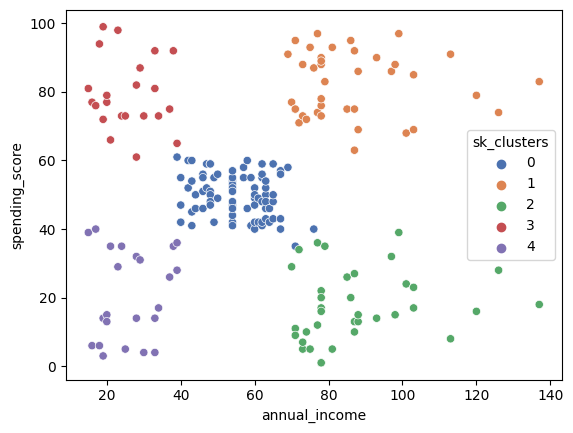

In [86]:
sns.scatterplot(data=df, x='annual_income', y='spending_score', hue='sk_clusters', palette='deep')
plt.show

In [87]:
mms = MinMaxScaler

In [92]:
mms = MinMaxScaler()
# Scale the 'annual_income' column and create a new column 'annual_income_scaled'
df['annual_income_scaled'] = mms.fit_transform(df[['annual_income']])

# Scale the 'spending_score' column and create a new column 'spending_score_scaled'
df['spending_score_scaled'] = mms.fit_transform(df[['spending_score']])

In [94]:
kmeans = KMeans(n_clusters=5, n_init='auto')
features = df[['annual_income_scaled', 'spending_score_scaled']]
kmeans.fit(features)


KMeans(n_clusters=5, n_init='auto')

In [95]:
df['sk_clusters_scaled'] = kmeans.labels_

In [96]:
features = df[['annual_income_scaled', 'spending_score_scaled', 'sk_clusters_scaled']]

<function matplotlib.pyplot.show(close=None, block=None)>

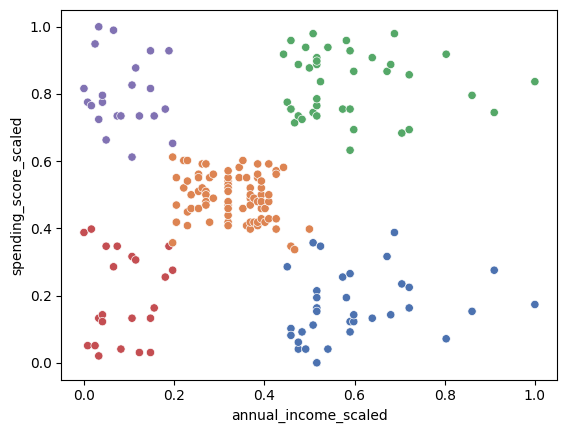

In [100]:
sns.scatterplot(data=df, x='annual_income_scaled', y='spending_score_scaled', hue='sk_clusters_scaled', palette='deep')
plt.legend().set_visible(False)
plt.show

In [105]:
# Define the bin edges and labels
age_bins = [0, 25, 50, 100]  # Customize the bin edges as per your requirements
age_labels = ['0-25', '26-50', '50+']

# Create a new column 'age_bin' with the binned values
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

<function matplotlib.pyplot.show(close=None, block=None)>

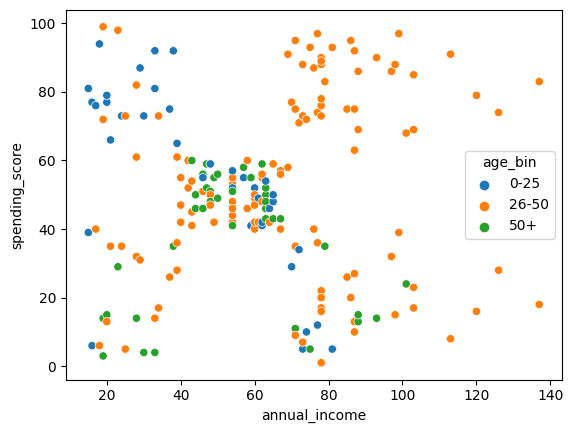

In [106]:
sns.scatterplot(data=df, x='annual_income', y='spending_score', hue='age_bin')
plt.show

Text(0, 0.5, 'Frequency')

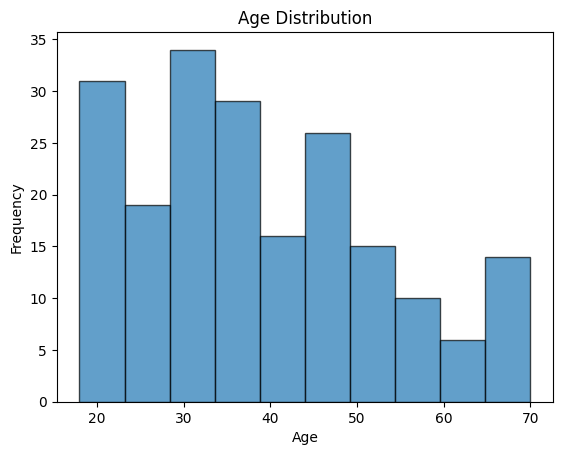

In [109]:
plt.hist(df['age'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [112]:
# Calculate quartiles to divide the age column into 3 equal parts
quartiles = np.percentile(df['age'], [33.33, 66.67])

# Create a function to categorize age into three parts
def categorize_age(age):
    if age <= quartiles[0]:
        return 'Part 1'
    elif age <= quartiles[1]:
        return 'Part 2'
    else:
        return 'Part 3'

# Apply the categorization function to create a new column 'age_parts'
df['age_groups'] = df['age'].apply(categorize_age)

<function matplotlib.pyplot.show(close=None, block=None)>

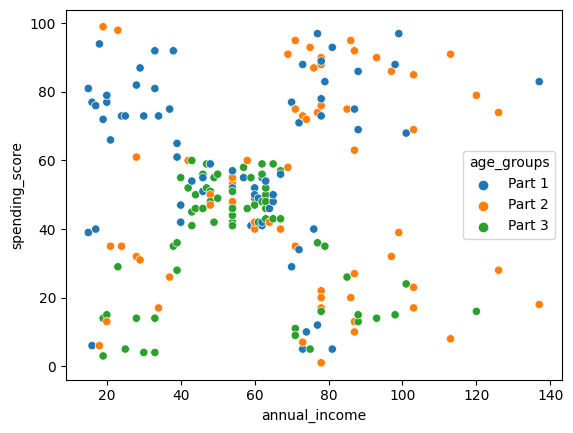

In [113]:
sns.scatterplot(data=df, x='annual_income', y='spending_score', hue='age_groups')
plt.show